# Tugas 1

## 1. Problem Statement

Analisis conversion rate merupakan suatu pencarian insight data persentase pengunjung website serta tindakann apa saja yang mereka lakukan selama mengunjungi situs, dan apakah tindakan mereka menghasilkan transaksi pembelian atau tidak selama berkunjung di website tersebut, hal in dapat dilakukan dengan melakukan featire engeenering pada variable data yang tersaji, sehingga dapat menghasilkan satu kolom baru yaitu Conversion rate. Setelah Conversion rate terbentuk, maka dapat dianalisis dengan variable lain seperti umur, penghasilan, pengeluaran, dll. sehingga dapat menemukan suatu pola perilaku konsumen.

## 2. Stages of Work 

### 2.1 Import Library & Dataset

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Membaca dataset
df_ori = pd.read_csv('../data/marketing_campaign_data.csv')
df = pd.read_csv('../data/marketing_campaign_data.csv')

### 2.2 Feature Engineering

#### 2.2.1 Conversion Rate

In [3]:
# Conversion Rate: #response / #visit
df['Conversion_Rate'] = df['Response'] / df['NumWebVisitsMonth']

#### 2.2.2 Age

In [4]:
# Menghitung umur berdasarkan Year_Birth
year_now = datetime.date.today().year
df['Age'] = year_now - df['Year_Birth']

In [25]:
df['Age'].unique

<bound method Series.unique of 0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2240, dtype: int64>

#### 2.2.2 Age Group

In [5]:
# Age_Group : Mengelompokkan umur ke beberapa kelompok
bins = [0, 20, 30, 40, 50, np.inf]
labels = ['Remaja', 'Dewasa Muda', 'Dewasa', 'Setengah Baya', 'Lanjut Usia']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

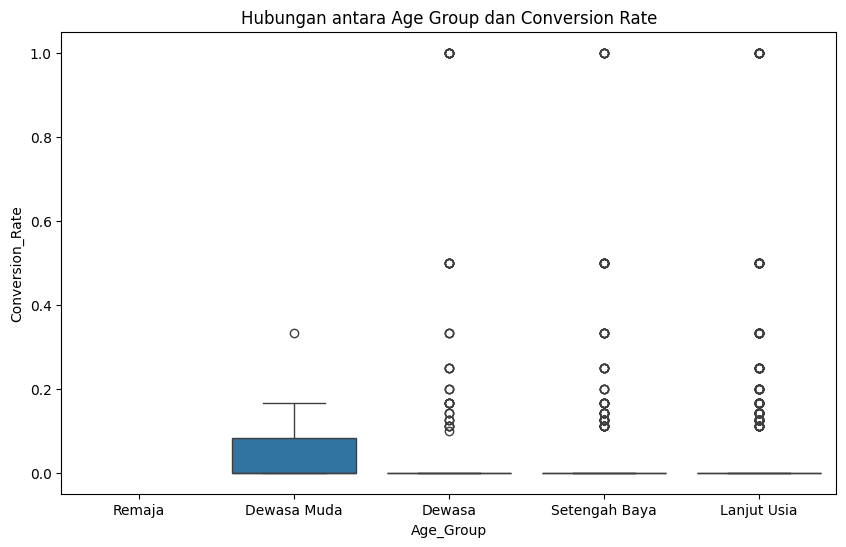

In [6]:
# Plot hubungan antara Conversion Rate dan Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Conversion_Rate', data=df)
plt.title('Hubungan antara Age Group dan Conversion Rate')
plt.show()

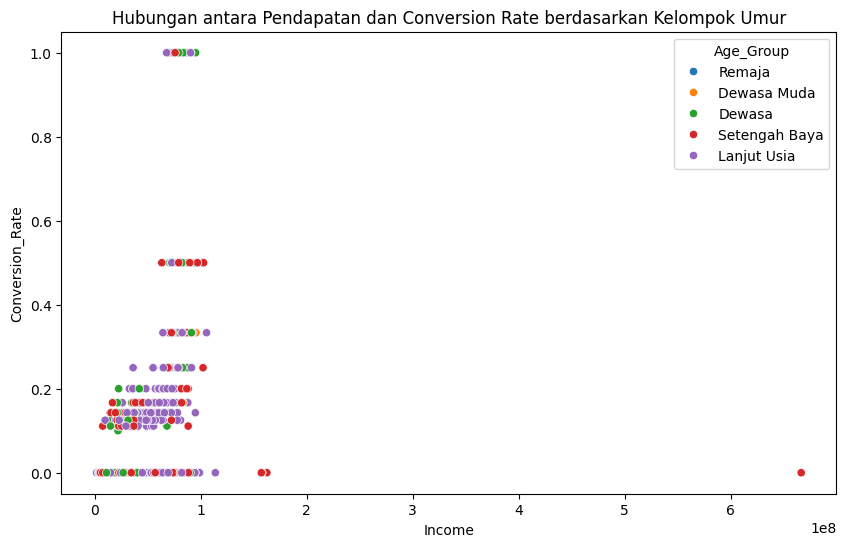

In [7]:
# Plot tambahan bisa dilakukan untuk pendapatan atau variabel lainnya
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Conversion_Rate', hue='Age_Group', data=df)
plt.title('Hubungan antara Pendapatan dan Conversion Rate berdasarkan Kelompok Umur')
plt.show()

#### 2.2.3 Total Kids

In [8]:
# Total_Kids : Jumlah anak berdasarkan Kidhome dan Teenhome
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']

#### 2.2.4 Total Spending

In [9]:
# Total_Spending : Menjumlahkan seluruh pengeluaran produk
df['Total_Spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

#### 2.2.5 Total Purchases

In [10]:
# Total_Purchases : Menjumlahkan seluruh jenis transaksi
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

### 2.3 Exploration Data Analysis (EDA)

In [11]:
# 3. Jumlah Anak: Jumlah anak berdasarkan Kidhome dan Teenhome
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']

#### 2.3.1 Quick EDA

In [12]:
# Informasi dataset
print("Info Dataset:")
print(df.info())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           2240 non-null   int64   
 1   ID                   2240 non-null   int64   
 2   Year_Birth           2240 non-null   int64   
 3   Education            2240 non-null   object  
 4   Marital_Status       2240 non-null   object  
 5   Income               2216 non-null   float64 
 6   Kidhome              2240 non-null   int64   
 7   Teenhome             2240 non-null   int64   
 8   Dt_Customer          2240 non-null   object  
 9   Recency              2240 non-null   int64   
 10  MntCoke              2240 non-null   int64   
 11  MntFruits            2240 non-null   int64   
 12  MntMeatProducts      2240 non-null   int64   
 13  MntFishProducts      2240 non-null   int64   
 14  MntSweetProducts     2240 non-null   int64   
 15  MntGold

Terdapat kolom yang tidak memiliki nama

In [13]:
# Pengecekan dataset
print("\nLima baris pertama dataset:")
df.head()


Lima baris pertama dataset:


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,Age,Age_Group,Total_Kids,Total_Spending,Total_Purchases
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,3,11,1,0.142857,67,Lanjut Usia,0,1617000,25
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,3,11,0,0.000000,70,Lanjut Usia,2,27000,6
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,3,11,0,0.000000,59,Lanjut Usia,0,776000,21
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,3,11,0,0.000000,40,Dewasa,1,53000,8
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,3,11,0,0.000000,43,Setengah Baya,1,422000,19


In [14]:
# Melihat deskripsi statistik dari dataset
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,Age,Total_Kids,Total_Spending,Total_Purchases
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2229.000000,2240.000000,2240.000000,2.240000e+03,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,0.013393,0.009375,3.0,11.0,0.149107,0.043686,55.194196,0.950446,6.057982e+05,14.862054
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,0.114976,0.096391,0.0,0.0,0.356274,0.142981,11.984069,0.751803,6.022493e+05,7.677173
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,28.000000,0.000000,5.000000e+03,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,47.000000,0.000000,6.875000e+04,8.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,54.000000,1.000000,3.960000e+05,15.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,65.000000,1.000000,1.045500e+06,21.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,1.000000,1.000000,3.0,11.0,1.000000,1.000000,131.000000,3.000000,2.525000e+06,44.000000


In [15]:
# Pengecekan data yang hilang
print("\nPengecekan Missing Values:")
df.isnull().sum()


Pengecekan Missing Values:


Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Conversion_Rate        11
Age                     0
Age_Group               0
Total_Kids              0
Total_Spending          0
Total_Purchases         0
dtype: int64

#### 2.3.2 Univariate Analysis

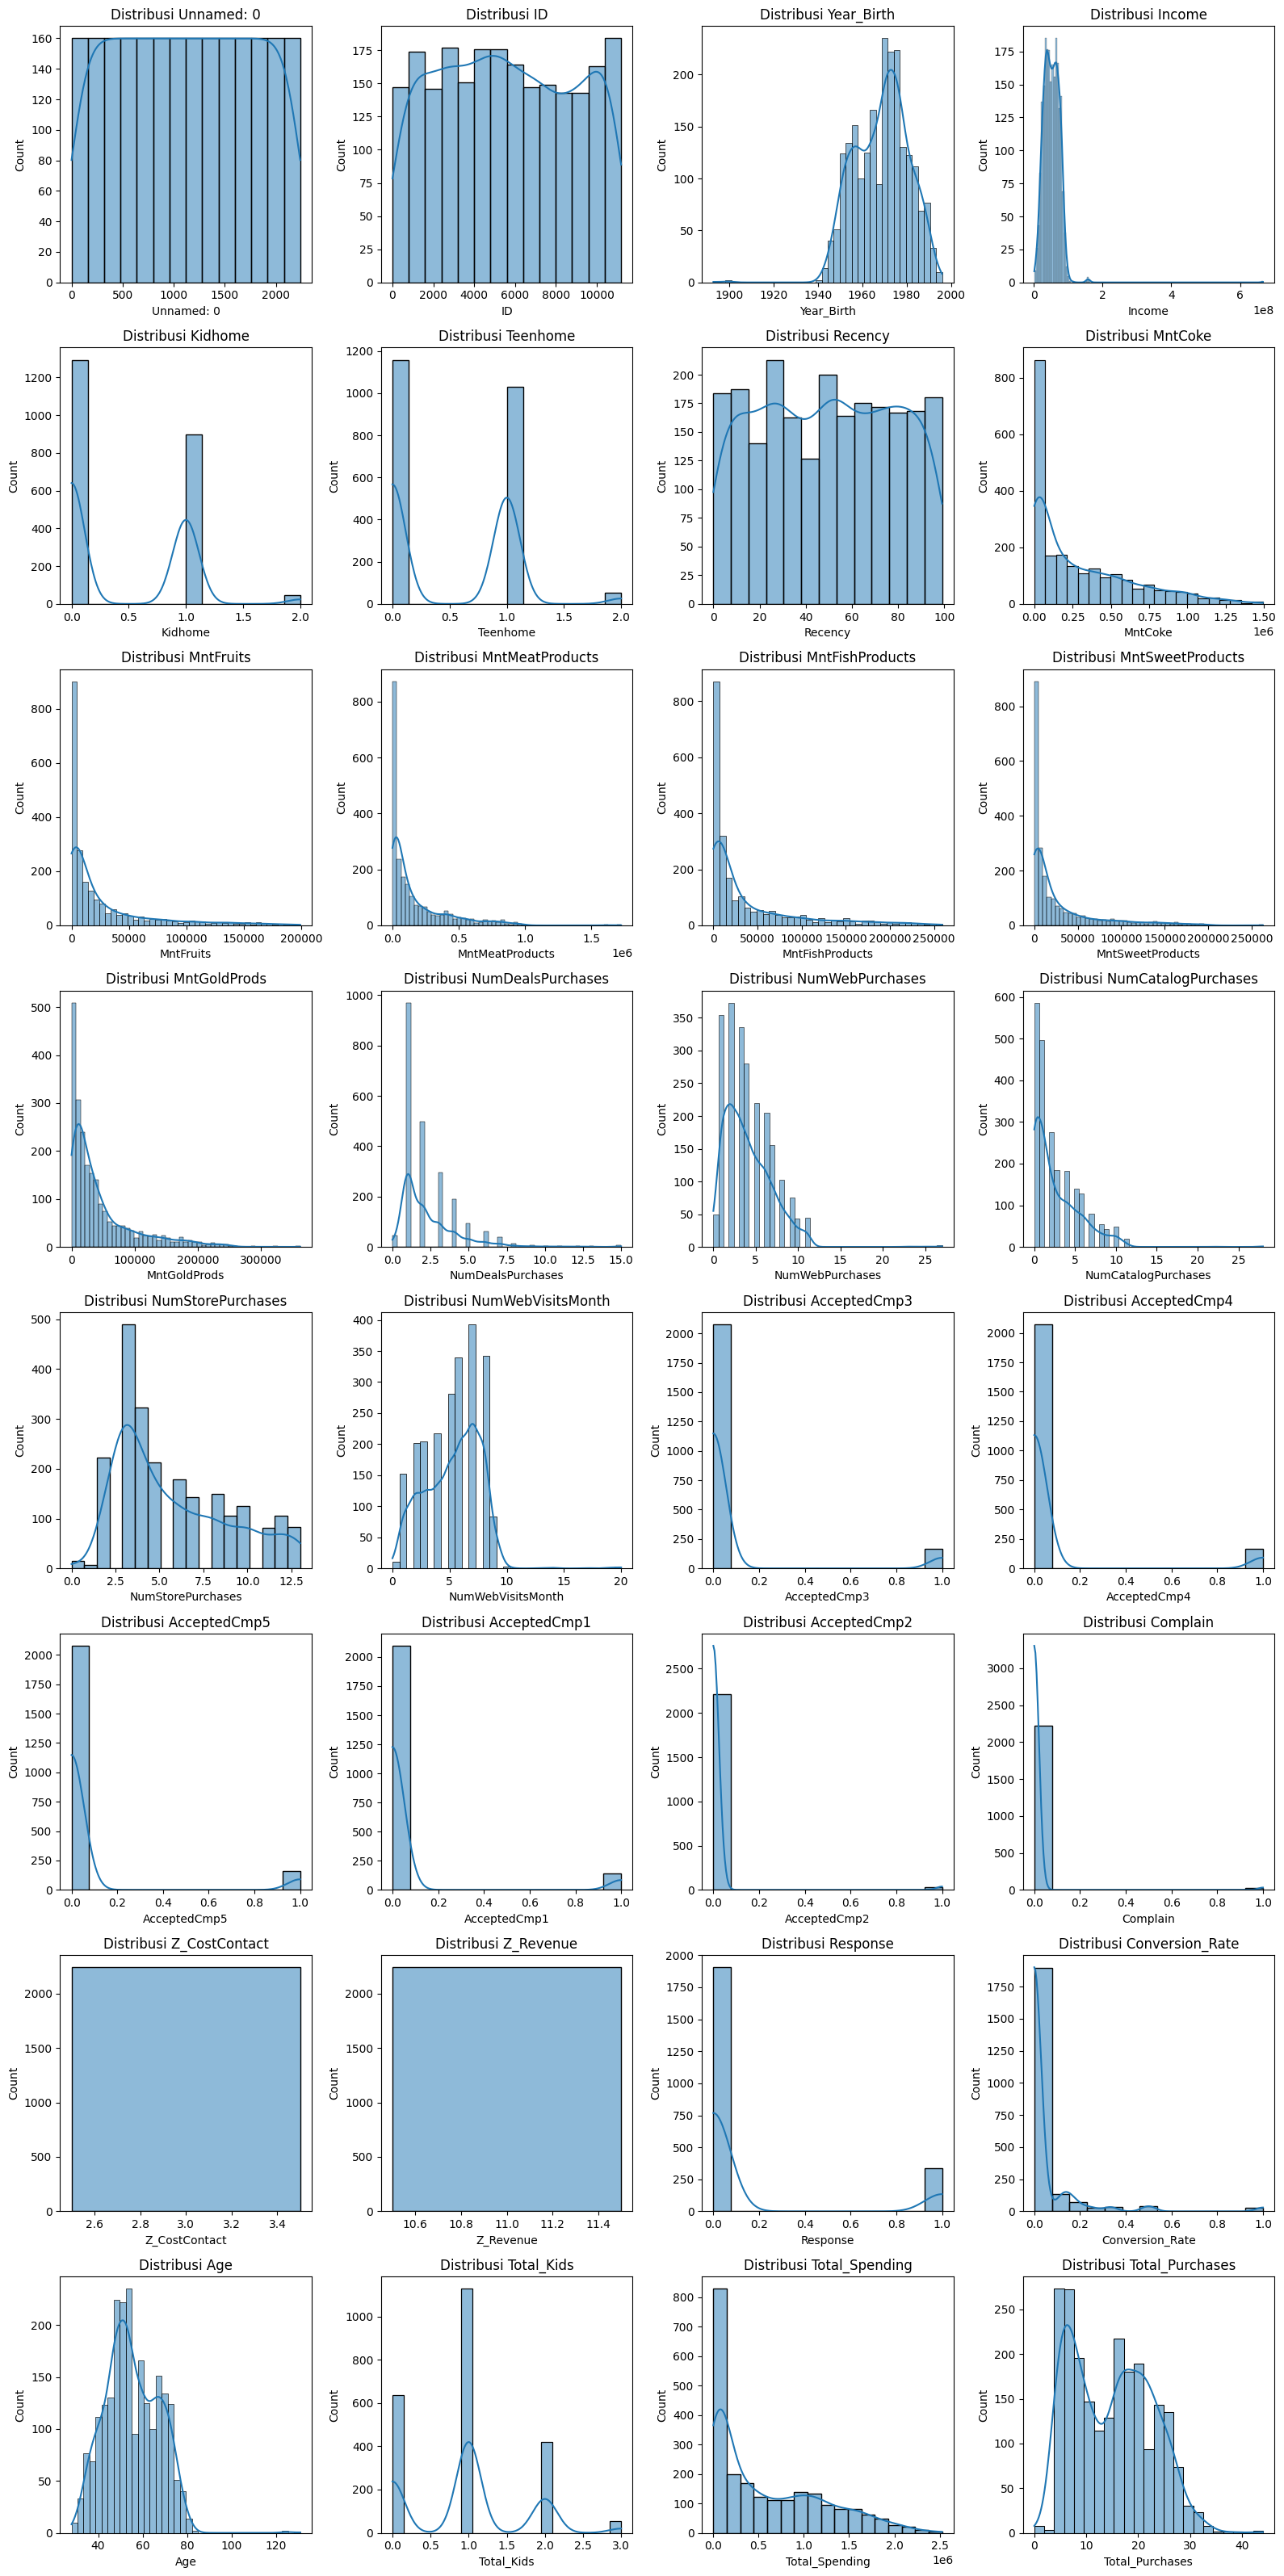

In [16]:
# Univariate Analysis for Numeric Variables

# Mengambil fitur numerik
numeric_features = df.select_dtypes(include=[np.number])

# Menentukan ukuran grid untuk subplot secara dinamis
num_features = len(numeric_features.columns)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(cols * 4, rows * 4))
for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

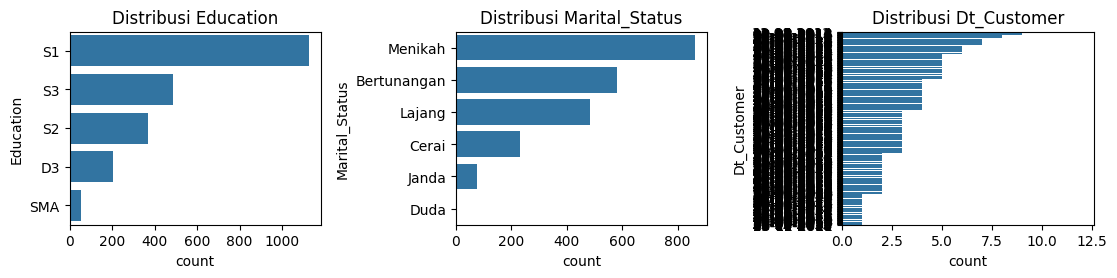

In [17]:
# Univariate Analysis for Categorical Variables
categorical_features = df.select_dtypes(include=[object])
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_features.columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

#### 2.3.3 Multivariate Analysis

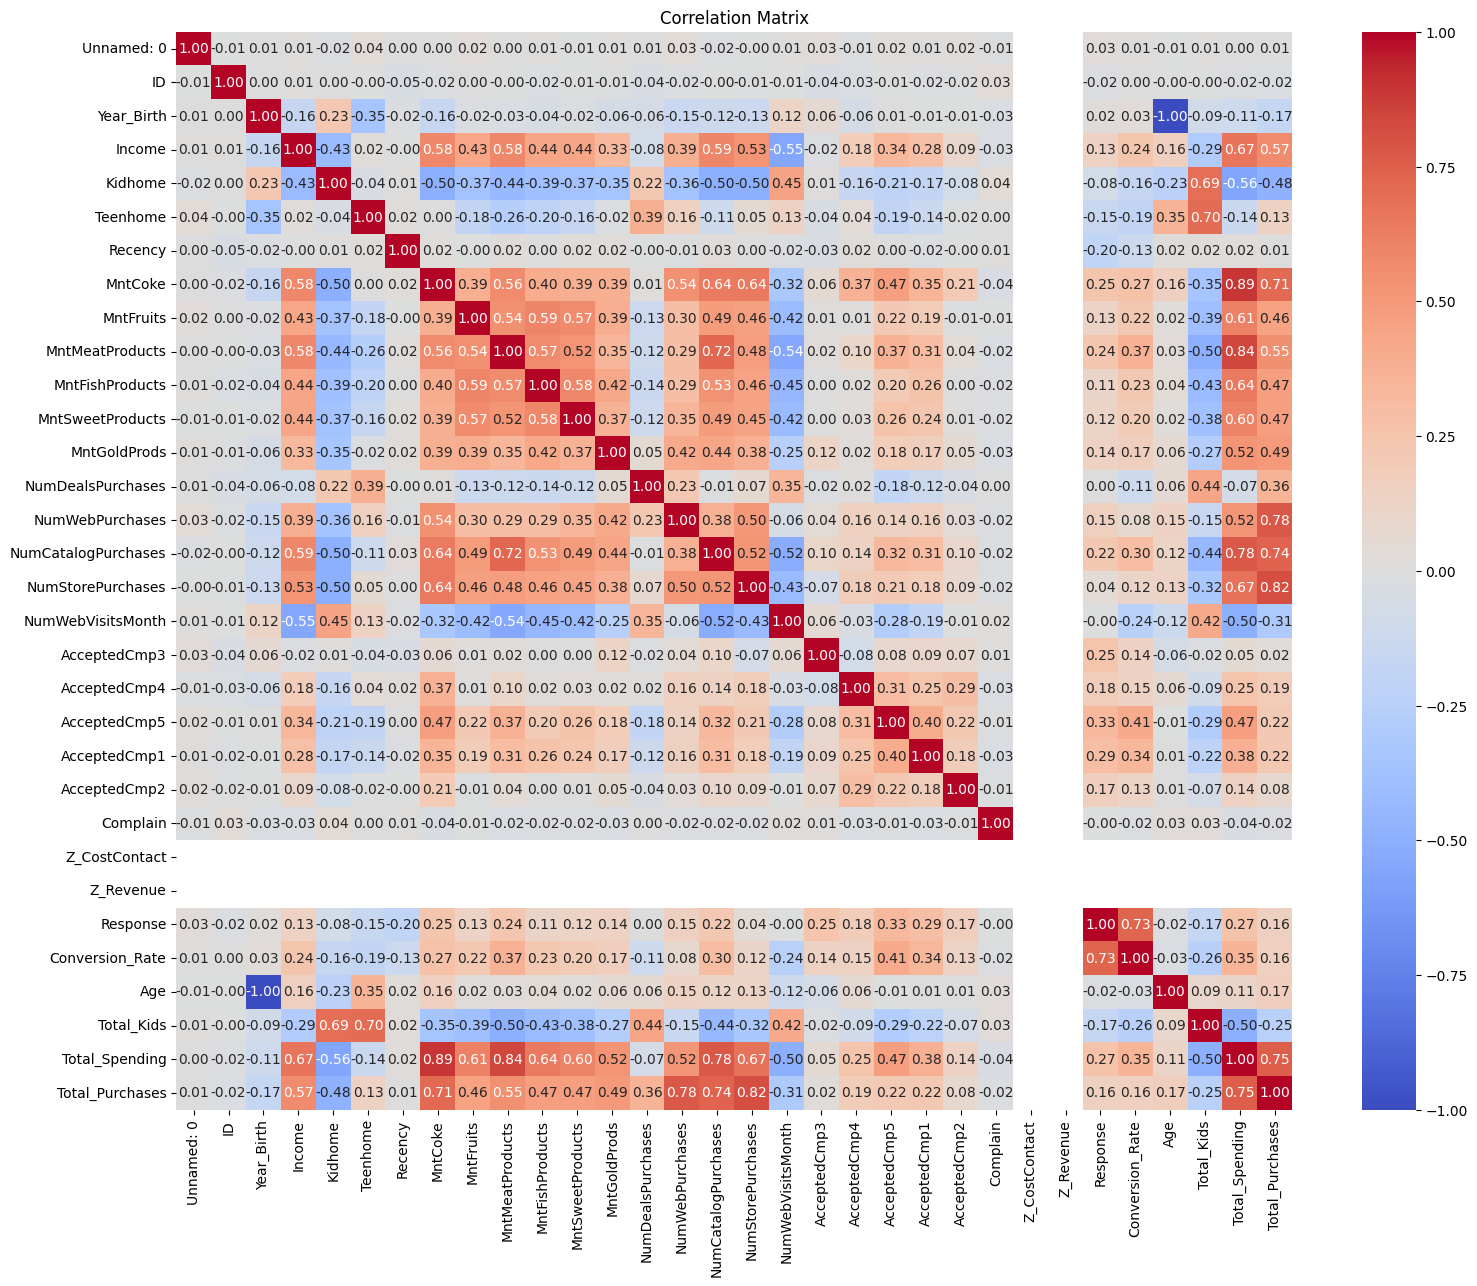

In [18]:
# Mengambil hanya fitur numerik
numeric_df = df.select_dtypes(include=[np.number])

# Pengecekan Correlation matrix antar fitur
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

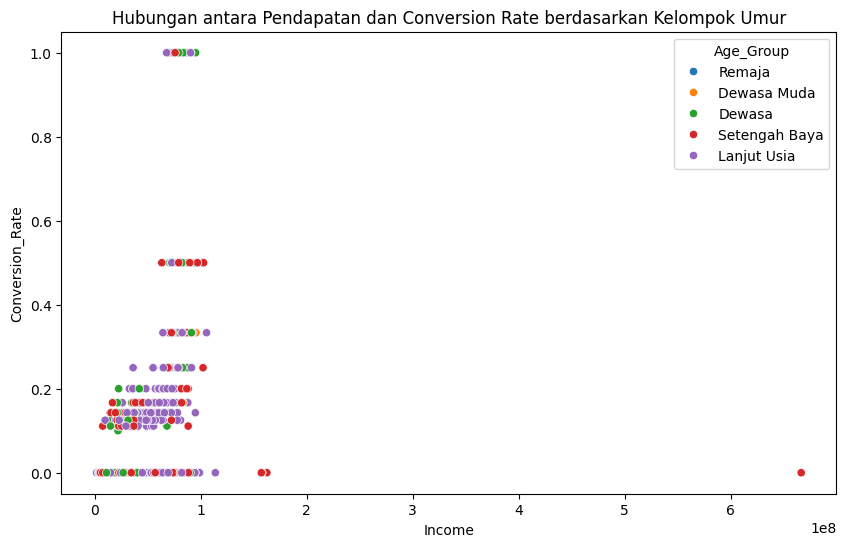

In [19]:
# Analisis lebih dalam terhadap korelasi yang signifikan
# Melihat korelasi antara pendapatan dan conversion rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Conversion_Rate', data=df, hue='Age_Group')
plt.title('Hubungan antara Pendapatan dan Conversion Rate berdasarkan Kelompok Umur')
plt.show()

### 2.4 Insights & Visualization

#### 2.4.1 Fact 1

> Sebagian besar conversion rate mendekati nol

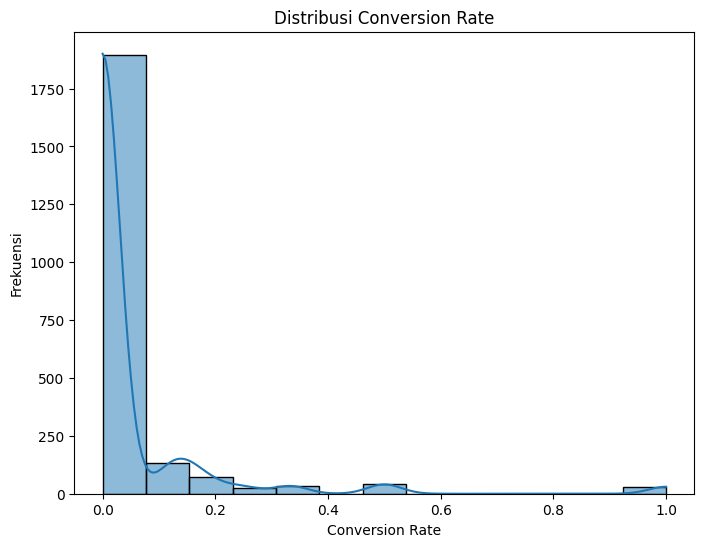

In [20]:
# Plot distribusi Conversion Rate
plt.figure(figsize=(8, 6))
sns.histplot(df['Conversion_Rate'], kde=True)
plt.title('Distribusi Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan grafik tersebut, berikut beberapa analisis yang dihasilkan.
- Distribusi skewed ke kanan, menunjukkan bahwa nilai rata-rata lebih besar daripada nilai modus

- Mayoritas conversion rate mendekati nol, menunjukkan bahwa mayoritas pengunjung website tidak melakukan respons atau tindakan yang signifikan setelah mengunjungi website.

- Beberapa pengunjung dengan conversion rate tinggi, menunjukkan bahwa ada sebagian kecil pengunjung yang melakukan respons terhadap kampanye pemasaran dengan sangat baik.

Dari Analisis tersebut, dapat diambil beberapa insight yaitu sebagai berikut.
- Efektivitas Kampanye Pemasaran, mengingat sebagian besar Conversion Rate mendekati 0, kampanye pemasaran saat ini kurang efektif dalam mendorong pengunjung untuk berkonversi.

- Segmentasi Pengunjung, mengingat ada sebagian kecil pengunjung dengan Conversion Rate yang tinggi, ini menunjukkan adanya segmen pengunjung yang merespon dengan baik. Perusahaan bisa fokus untuk mengidentifikasi karakteristik segmen ini dan menyesuaikan strategi pemasaran untuk menarik lebih banyak pengunjung seperti mereka.

- Perlu Meningkatkan Engagement, dengan banyaknya pengunjung yang memiliki Conversion Rate sangat rendah, perusahaan perlu mencari cara untuk meningkatkan engagement di website.

#### 2.4.2 Fact 2

> Sebagian besar pelanggan berada dalam rentang usia 40-60 tahun

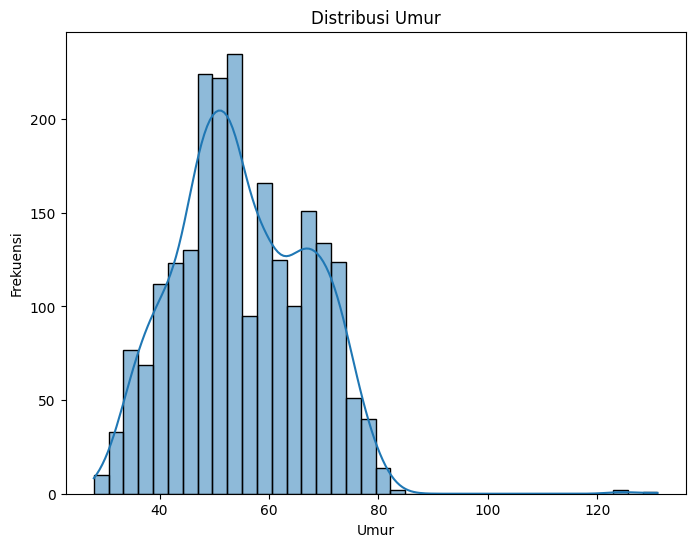

In [21]:
# Plot distribusi Umur
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan grafik tersebut, berikut beberapa analisis yang dihasilkan.
- Distribusi skewed ke kanan, menunjukkan bahwa nilai rata-rata lebih besar daripada nilai modus. Puncak distribusi berada di rentang usia 40-60 tahun. 

- Adanya outlier di usia lebih dari 100 tahun, menunjukkan bahwa adanya segmen pelanggan yang sangat tua.

- Kisaran usia yang lebar, menunjukkan bahwa pelanggan mencakup berbagai kelompok usia, mulai dari sekitar 30 tahun hingga lebih dari 100 tahun

Dari Analisis tersebut, dapat diambil beberapa insight yaitu sebagai berikut.

- Target pasar utama, dengan mayoritas pelanggan berada dalam rentang usia 40-60 tahun, perusahaan dapat menyimpulkan bahwa target pasar utama saat ini adalah kelompok usia menengah hingga lanjut usia. Oleh karena itu, strategi pemasaran dan produk yang dikembangkan harus relevan dengan preferensi dan kebutuhan mereka.

- Peluang untuk Segmentasi Pasar, mengingat adanya variasi dalam distribusi umur, perusahaan memiliki peluang untuk melakukan segmentasi pasar lebih lanjut berdasarkan usia. Misalnya, perusahaan bisa menciptakan kampanye pemasaran yang lebih khusus dan relevan untuk kelompok usia yang lebih muda (30-40 tahun) atau lebih tua (60 tahun ke atas).


#### 2.4.3 Fact 3

> Kelompok dewasa muda adalah kelompok umur dengan pengeluaran tertinggi

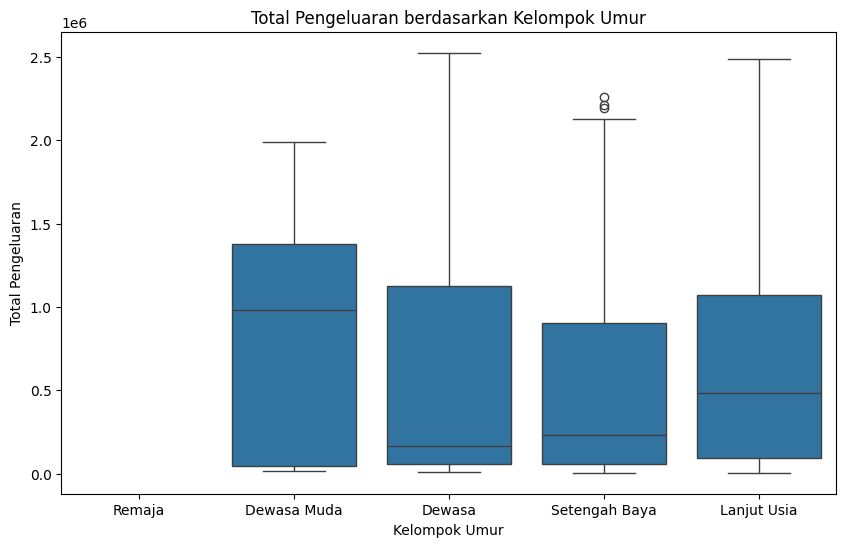

In [22]:
# Plot hubungan antara Total Spending dan Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Total_Spending', data=df)
plt.title('Total Pengeluaran berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Total Pengeluaran')
plt.show()

Berdasarkan grafik tersebut, berikut beberapa analisis yang dihasilkan.
- Variasi pengeluaran berdasarkan kelompok umur, menujukkan bahwa terdapat variasi pengeluaran untuk setiap kelompok umur.

- Median total pengeluaran tertinggi yakni kelompok dewasa muda.

- Terdapat beberapa outliers, hal ini dapat memberikan informasi tentang segmen pelanggan yang memiliki perilaku pengeluaran yang tidak biasa.

Dari Analisis tersebut, dapat diambil beberapa insight yaitu sebagai berikut.

- Kelompok umur dengan pengeluaran tertinggi, yakni kelompok dewasa muda bisa menjadi target pasar yang menarik untuk kampanye pemasaran yang difokuskan pada produk atau layanan premium.

- Preferensi belanja berdasarkan kelompok umur, hal ini bisa menunjukkan preferensi belanja yang berbeda. Dengan memahami preferensi ini bisa membantu perusahaan menyesuaikan penawaran produk mereka.

- Analisis outlier untuk strategi khusus, pelanggan yang termasuk outliers mungkin merupakan high spenders yang bisa diberikan penawaran khusus atau layanan premium untuk meningkatkan loyalitas. Di sisi lain, outliers dengan pengeluaran sangat rendah juga dapat dianalisis untuk memahami hambatan pengeluaran mereka dan mengembangkan strategi untuk mengatasi hal ini.

#### 2.4.4 Fact 4

> Kelompok dewasa muda adalah kelompok umur dengan total transaksi tertinggi

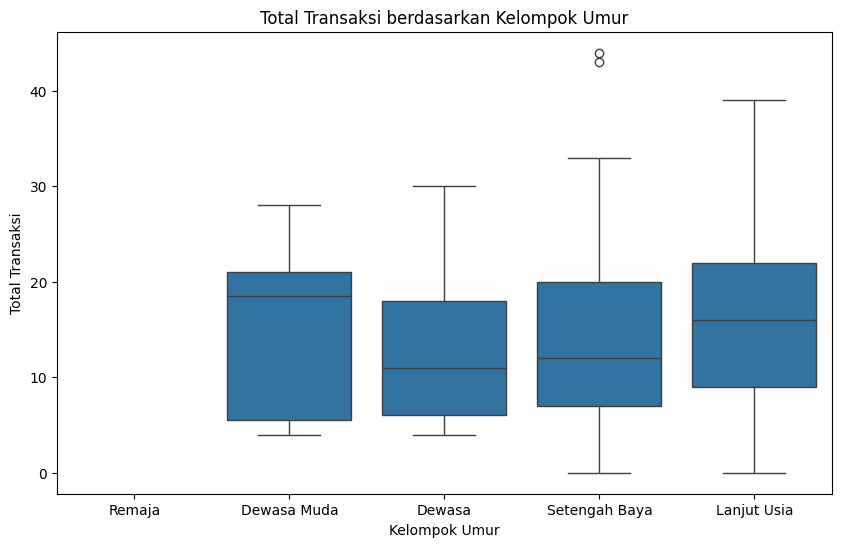

In [23]:
# Plot hubungan antara Total Purchases dan Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Total_Purchases', data=df)
plt.title('Total Transaksi berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Total Transaksi')
plt.show()

Berdasarkan grafik tersebut, berikut beberapa analisis yang dihasilkan.
- Distribusi total transaksi berdasarkan kelompok umur cukup bervariasi.

- Median total transaksi tertinggi yakni kelompok dewasa muda.

- Terdapat beberapa outliers, hal ini dapat memberikan informasi tentang segmen pelanggan yang memiliki perilaku pengeluaran yang tidak biasa.

Dari Analisis tersebut, dapat diambil beberapa insight yaitu sebagai berikut.

- Kelompok umur dengan aktivitas transaksi tertinggi, yakni kelompok dewasa muda dimana kelompok ini lebih aktif berbelanja. Perusahaan dapat memfokuskan upaya pemasaran mereka untuk meningkatkan engagement dengan kelompok ini, misalnya melalui penawaran khusus atau program loyalitas.

- Variasi pola perilaku transaksi berdasarkan kelompok umur, menunjukkan perbedaan perilaku pembelian. Kelompok yang lebih muda mungkin lebih sering melakukan pembelian dalam jumlah kecil, sementara kelompok yang lebih tua mungkin melakukan pembelian yang lebih jarang namun dalam jumlah yang lebih besar.

- Analisis outlier untuk penawaran khusus, outliers dengan jumlah transaksi yang sangat tinggi bisa jadi merupakan pelanggan setia atau pelanggan dengan potensi tinggi. Perusahaan dapat mempertimbangkan untuk memberikan penawaran khusus atau penghargaan kepada pelanggan ini untuk meningkatkan loyalitas mereka. Sebaliknya, outliers dengan jumlah transaksi yang sangat rendah mungkin memerlukan pendekatan yang berbeda untuk meningkatkan keterlibatan mereka.